In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. head, shape, info

In [3]:
display(customer_df.head())
print()
print('SHAPE:',customer_df.shape)
print()
customer_df.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



SHAPE: (9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto        

## 4. Rename the columns

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 5. Fix the data types

In [5]:
customer_df['policy'] = customer_df['policy'].str[-2:]
customer_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

Extracting and keeping only the subcategory 'numerical part' on the 'policy' column, which will not cause any data loss, and will help reduce multicollinearity after enconding

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

Converted time column to datetime format

## 6. Correlation matrix with numerical features

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


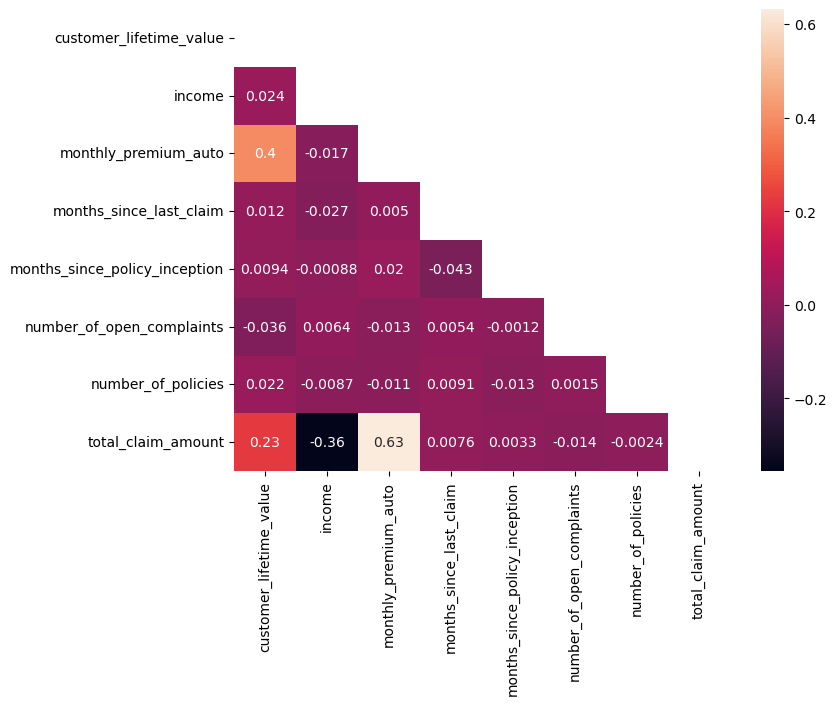

In [13]:
customer_df_num = customer_df.select_dtypes(np.number)
corr_matrix = customer_df_num.corr()
display(corr_matrix)

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

### Insights:
#### No features show any high level of correlation amongst themselves.
#### Some features show some degree of correlation with the target 'total_claim_amount':
* highest value of 0.63 of 'monthly_premium_auto'.
    * shows that the amount payed monthly by the customer relates to the total amount they claim on insurance.
* followed by 'income':
    * negative value shows that the lower the customers income, the higher chance they claim a larger amount.
* and finally 'loanamount':
    * showing a small degree of correlation of 0.23

## 7. Plotting numerical features

customer_lifetime_value


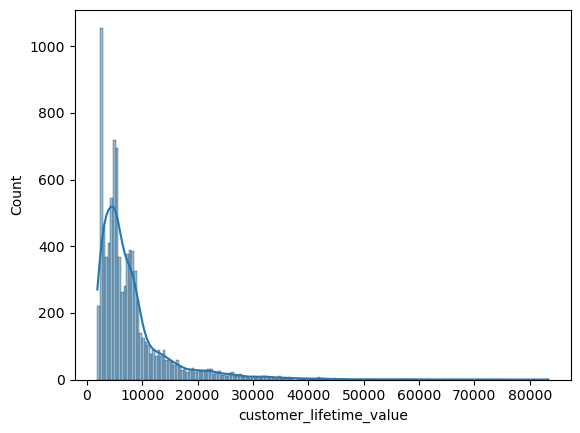

income


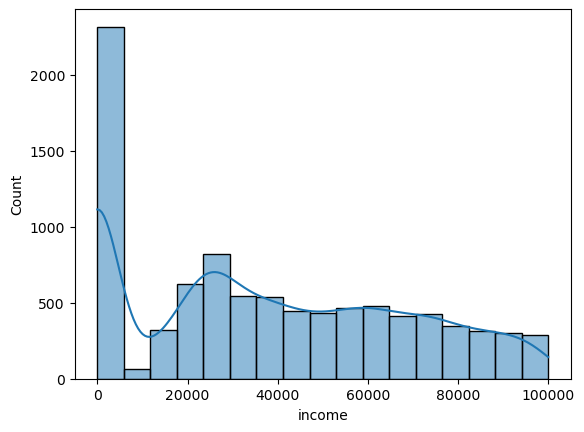

monthly_premium_auto


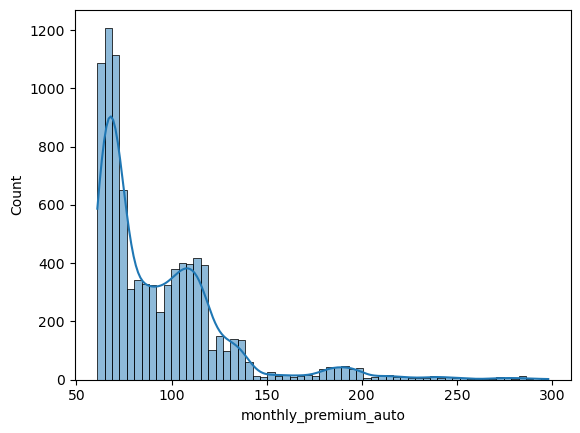

months_since_last_claim


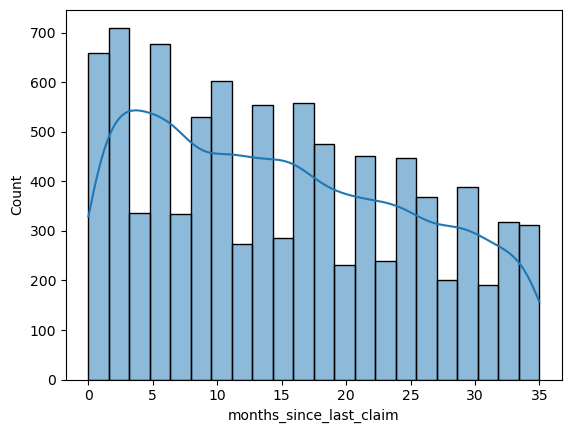

months_since_policy_inception


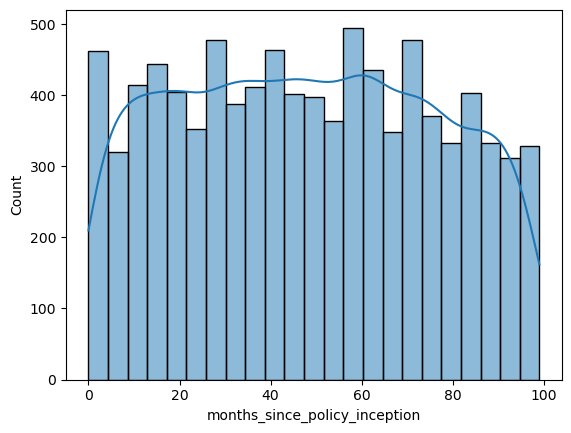

number_of_open_complaints


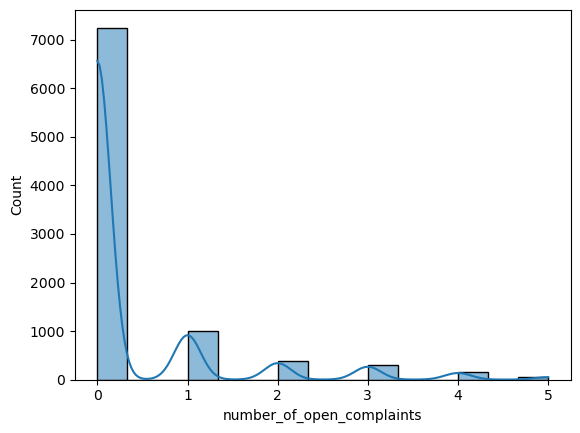

number_of_policies


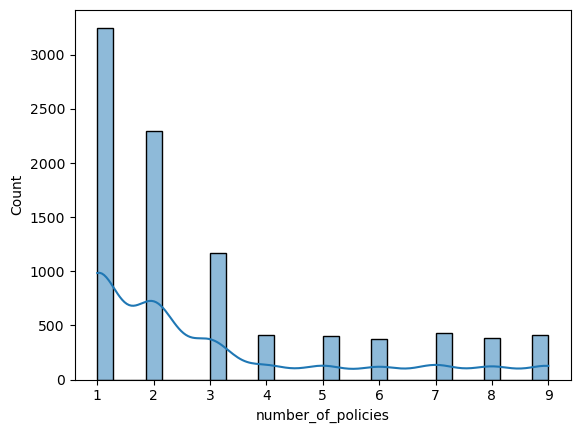

total_claim_amount


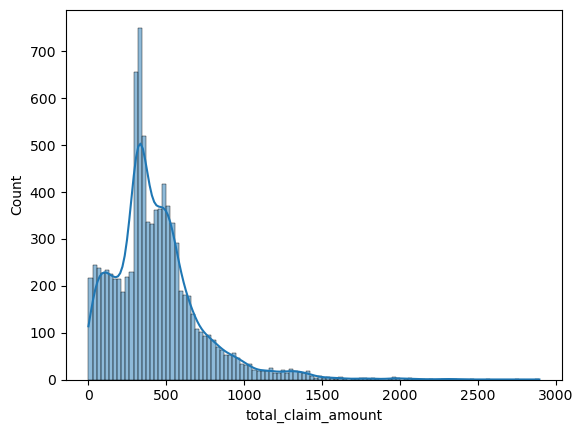

In [8]:
for col in customer_df_num.columns:
    print(col)
    sns.histplot(customer_df_num[col], kde=True)
    plt.show()

#### As seen above:

   Most numerical columns follow a normal distribution, with a skew to the positive side, which makes sense when dealing with monetary values.
   
   The exception being time based columns, 'months_since_policy_inception' and 'months_since_last_claim'

## 8. Plotting categorical features

In [9]:
customer_df = customer_df.drop('customer', axis=1)
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,L2,Offer3,Branch,691.200000,Four-Door Car,Large


Dropped customer ID

state


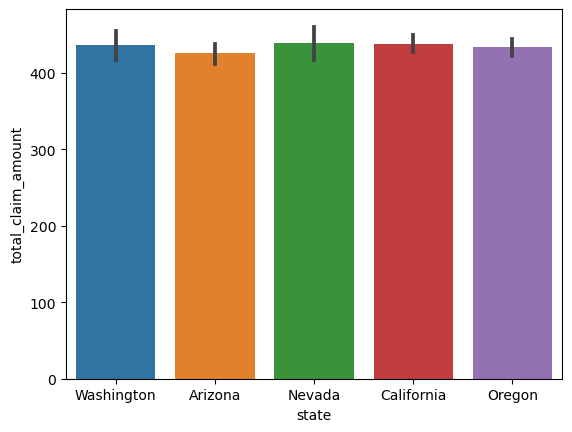

response


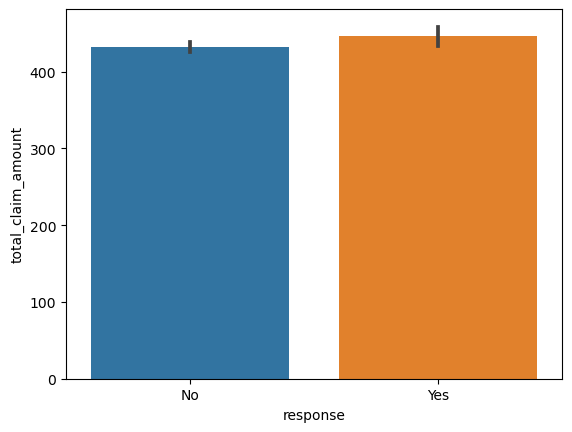

coverage


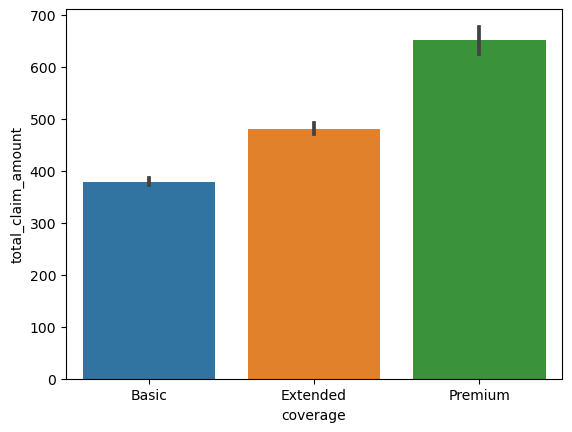

education


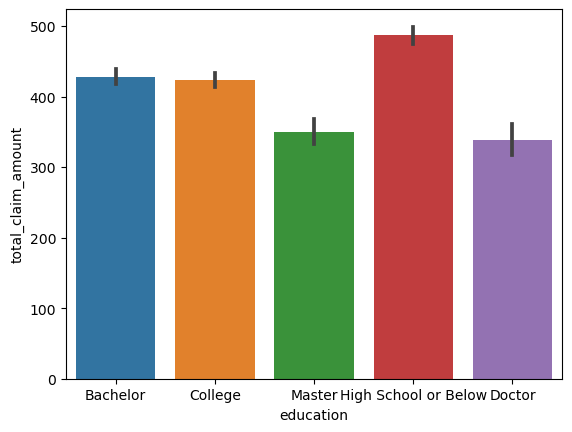

employmentstatus


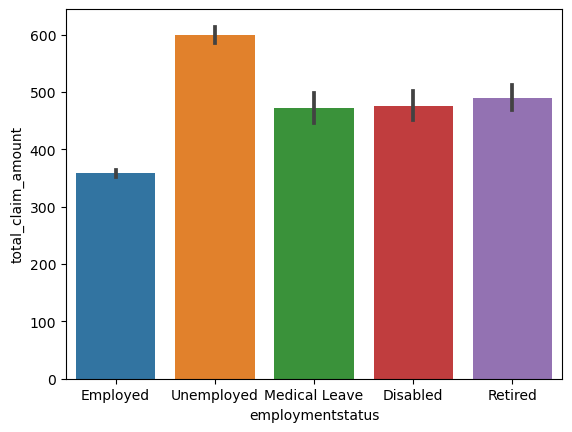

gender


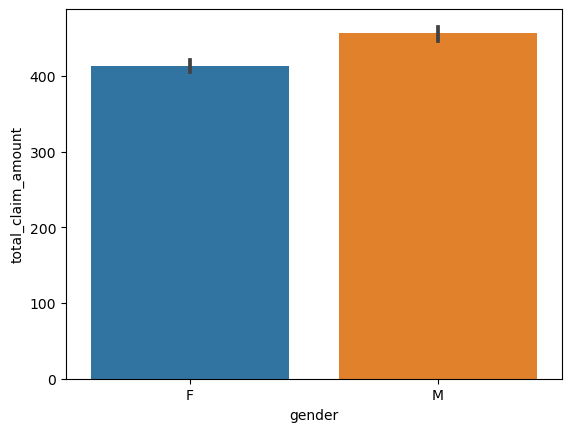

location_code


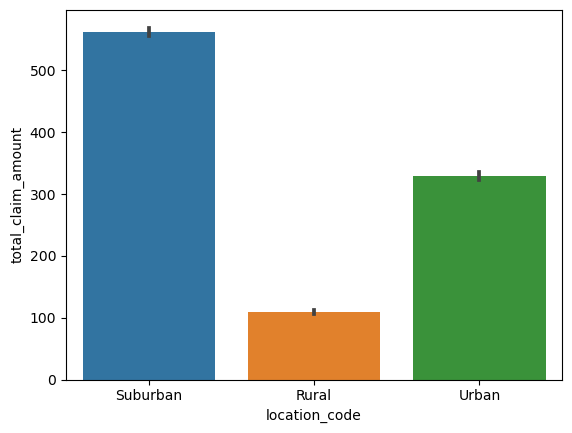

marital_status


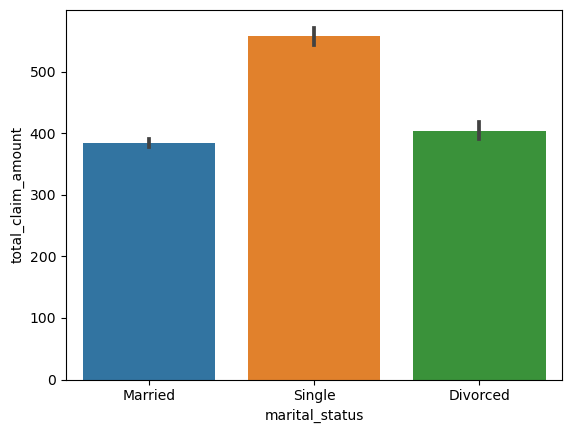

policy_type


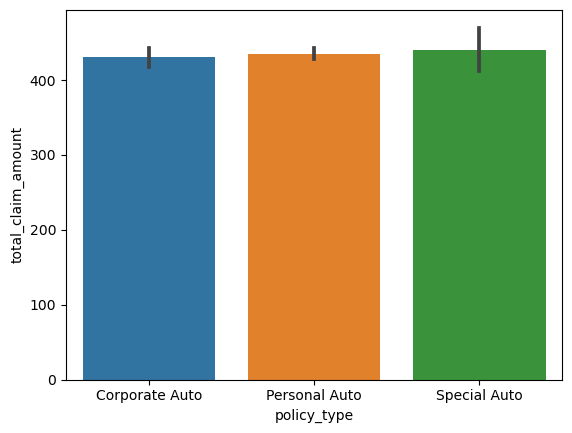

policy


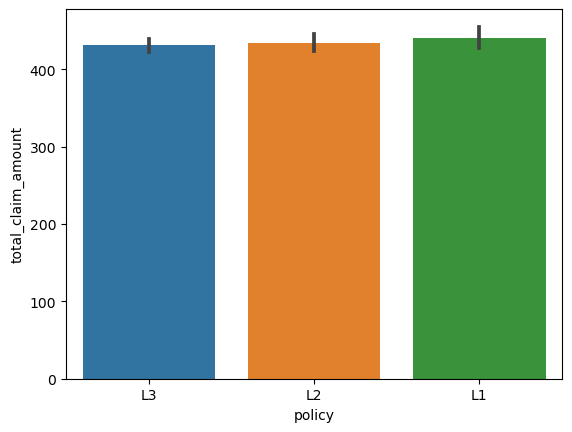

renew_offer_type


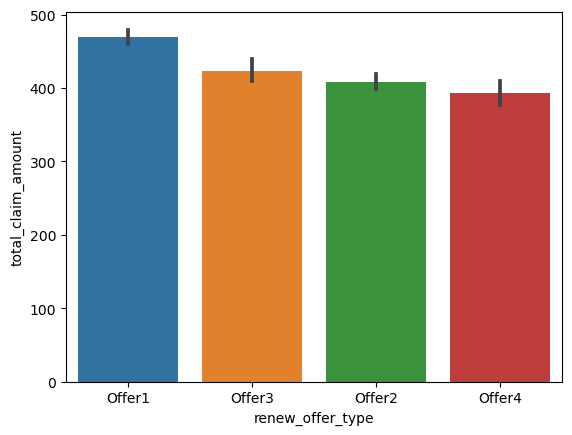

sales_channel


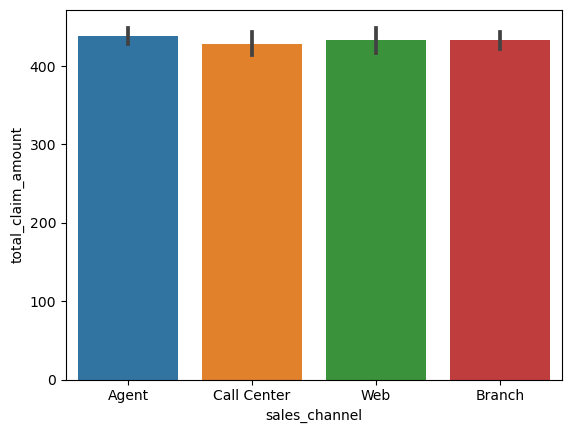

vehicle_class


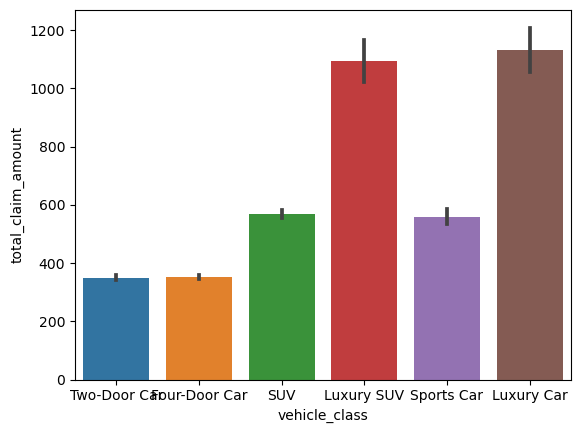

vehicle_size


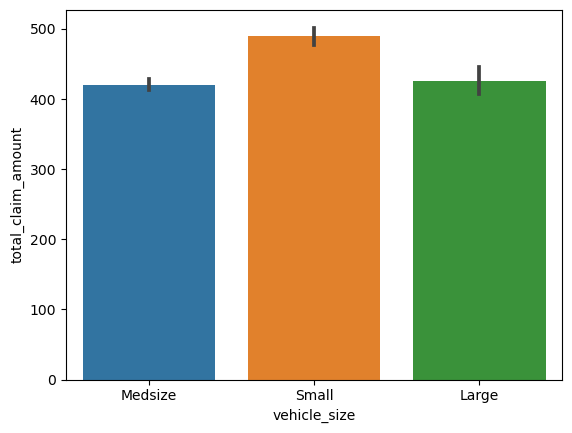

In [10]:
for col in customer_df.select_dtypes('object'):
    print(col)
    sns.barplot(data=customer_df, x=col, y='total_claim_amount')
    plt.show()

### Insights:
#### 'coverage':
* Customers on a Premium plan claim more.
#### 'education':
* Tendency to claim more from customers the less their education level, with HS or below at a larger average and MS/PHDs at lower averages.
#### 'employmentstatus':
* Employed customers claim less and umemployed more.
#### 'location_code':
* Large tendency towards bigger claim amounts in suburban areas, and opposite in rural areas
#### 'renew_offer_type':
* Larger claim amounts from Offer1 to Offer4, in order.
#### 'renew_offer_type':
* Larger claim amounts from the two types of luxury vehicles, and smaller from 2 and 4 doors.
#### 'renew_offer_type':
* slighly larger claim amounts from smaller cars.
#### all other columns:
* Evenly distributed or very close to.

## 9. Dealing with outliers

customer_lifetime_value


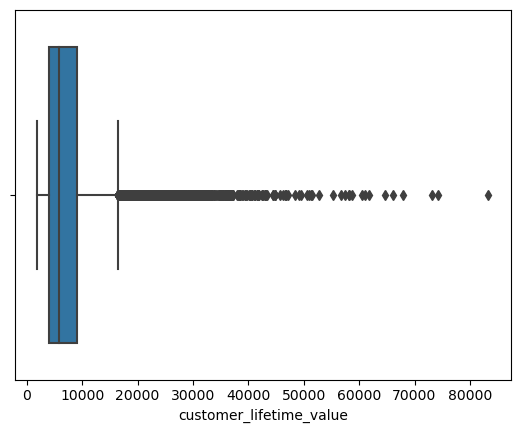

income


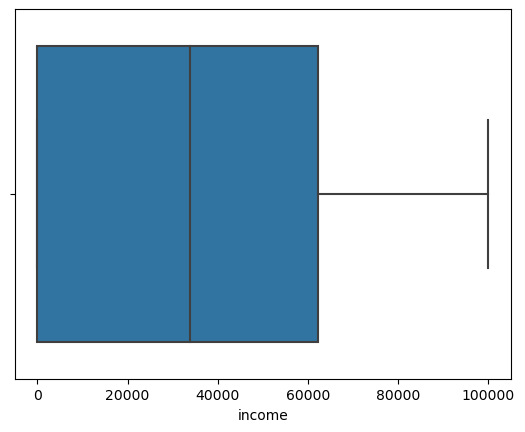

monthly_premium_auto


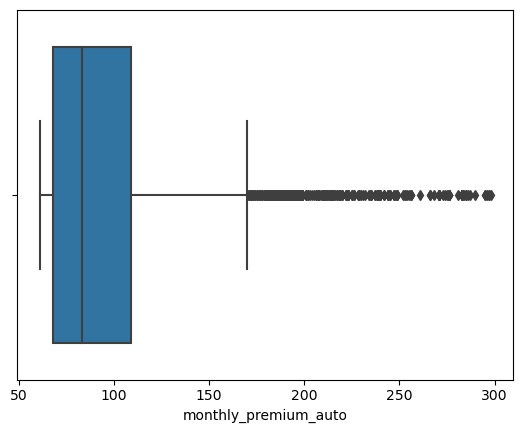

months_since_last_claim


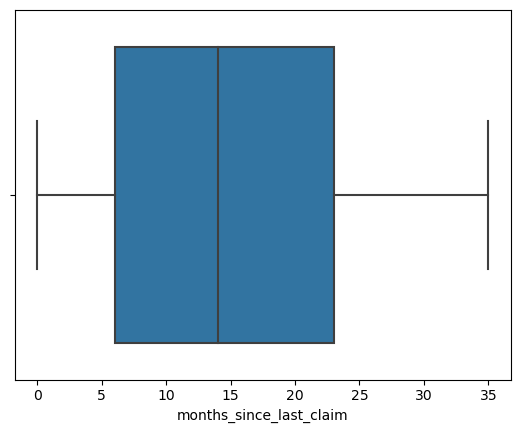

months_since_policy_inception


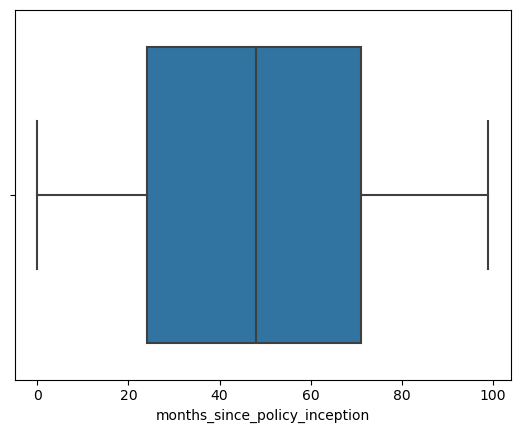

number_of_open_complaints


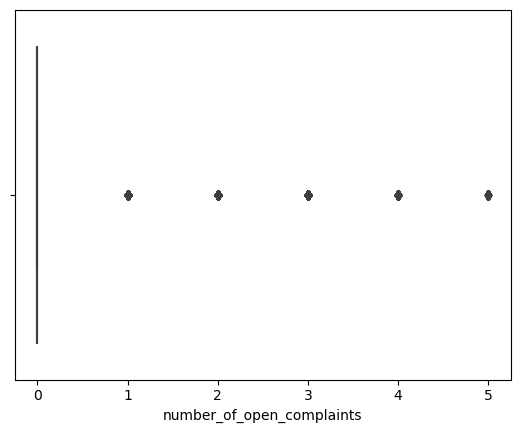

number_of_policies


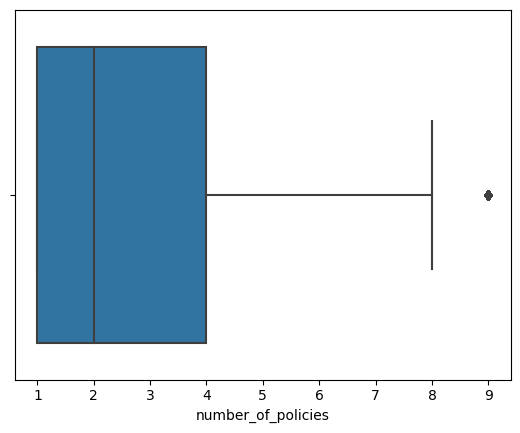

total_claim_amount


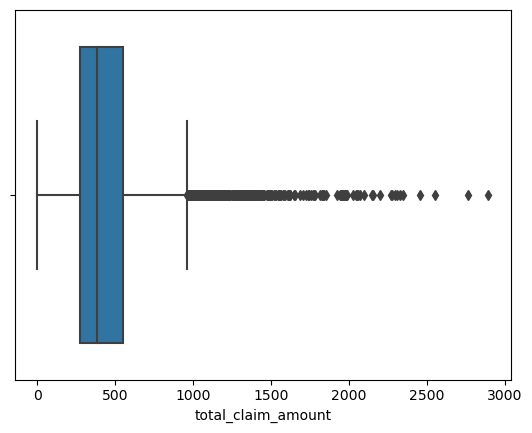

In [11]:
for col in customer_df_num.columns:
    print(col)
    sns.boxplot(x=customer_df_num[col])
    plt.show()

Outliers are to be removed outside the calculated IQR. The outliers on the dataset were shown to be positive only, which makes sense when dealing with monetary values

## 10. Checking for nulls

In [12]:
for col in customer_df.select_dtypes('number'):
    print(col, 'nulls: ', customer_df[col].isna().sum())

customer_lifetime_value nulls:  0
income nulls:  0
monthly_premium_auto nulls:  0
months_since_last_claim nulls:  0
months_since_policy_inception nulls:  0
number_of_open_complaints nulls:  0
number_of_policies nulls:  0
total_claim_amount nulls:  0


No missing values found